In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import import_ipynb
import cuia

importing Jupyter notebook from cuia.ipynb


In [3]:
cuia.download("https://raw.githubusercontent.com/opencv/opencv/4.x/samples/dnn/face_detector/deploy.prototxt")
cuia.download("https://github.com/opencv/opencv_3rdparty/raw/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel")

In [4]:
detector = cv2.dnn.readNetFromCaffe("deploy.prototxt" , "res10_300x300_ssd_iter_140000.caffemodel")

In [5]:
oscars = cv2.imread("oscars.jpg")

In [6]:
mini = cv2.resize(oscars.copy(), (300,300))

In [7]:
input = cv2.dnn.blobFromImage(mini)

In [8]:
detector.setInput(input)
caras = detector.forward()

In [9]:
#column_labels = ["id", "is_face", "confidence", "left", "top", "right", "bottom"]

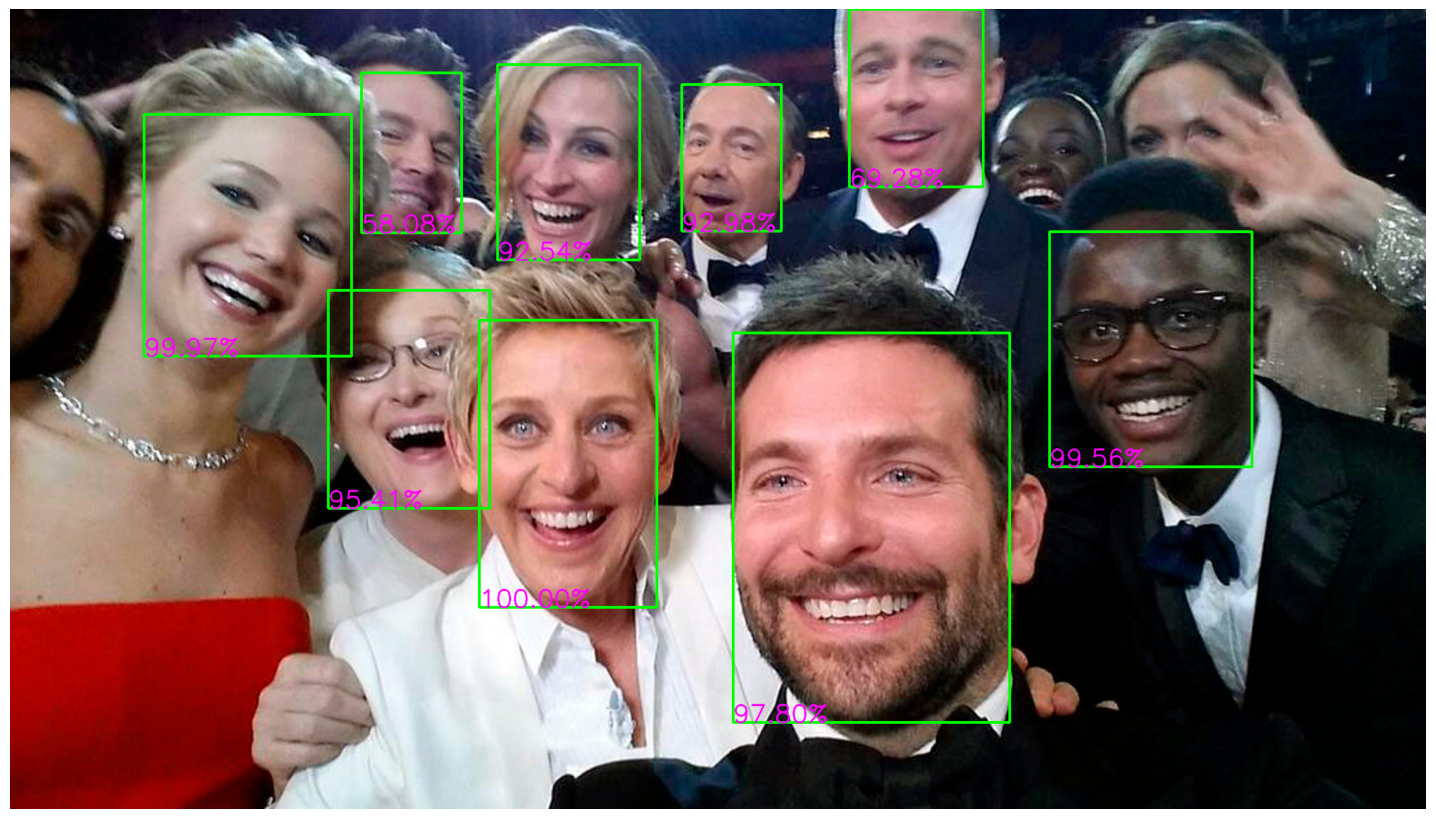

In [34]:
imagen = oscars.copy()
h, w, _ = imagen.shape
for cara in caras[0][0]:
    if cara[1] == 1 and cara[2]>0.5:
        c1 = (int(w*cara[3]), int(h*cara[6]))
        c2 = (int(w*cara[5]), int(h*cara[4]))
        cv2.rectangle(imagen, c1, c2, (0,255,0),3)
        cv2.putText(imagen, f'{cara[2]*100:.2f}%', c1, cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255,0,255), 2, cv2.LINE_AA)
        
cuia.plot(imagen)

In [22]:
print(caras[0][0][0])

[0.         1.         0.99997973 0.33159247 0.38918132 0.4568189
 0.747989  ]
